In [34]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier,BaggingRegressor
from sklearn.datasets import make_classification,make_regression
from sklearn.metrics import r2_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.linear_model import LinearRegression,LogisticRegression

# Classification

In [21]:
x,y = make_classification(n_samples=1001,n_features=5,n_classes=2,n_informative=3)
x[:,0:1]

array([[-1.90097948],
       [-1.16063051],
       [-2.04956141],
       ...,
       [-0.17796668],
       [-0.34561888],
       [-1.11217778]])

In [27]:
data = pd.DataFrame({
    'column1':x[:,0:1].flatten(),
    'column2':x[:,1:2].flatten(),
    'column3':x[:,2:3].flatten(),
    'column4':x[:,3:4].flatten(),
    'column5':x[:,4:5].flatten()
})
data['target'] = y.flatten()
data

,column1,column2,column3,column4,column5,target
0,-1.900979,-2.132844,0.471725,1.722541,-3.495655,1
1,-1.160631,-0.274471,1.028456,0.415750,-0.093029,1
2,-2.049561,1.175810,-1.160903,-0.726366,-1.162382,0
3,-0.263406,-3.309622,3.002725,2.633872,-1.211671,0
4,0.345212,-0.409527,-0.161061,0.232013,-0.434487,0
...,...,...,...,...,...,...
996,-1.956483,1.324777,0.359447,-0.681438,0.653032,1
997,-2.222674,0.668386,-0.122370,-0.248981,-0.845638,1
998,-0.177967,-0.035378,-0.784556,-0.038676,-0.975878,1
999,-0.345619,-2.222520,2.249685,1.810188,-0.691340,0


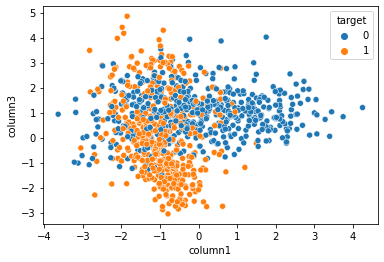

In [37]:
sns.scatterplot(x='column1', y='column3', hue='target', data=data)
plt.show()

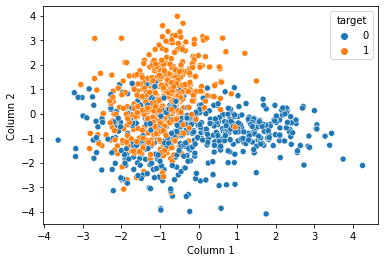

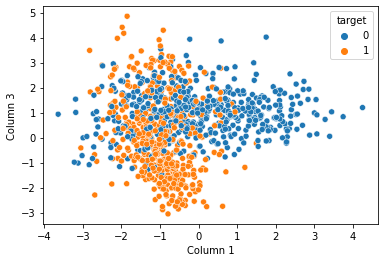

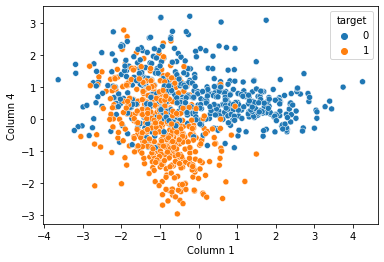

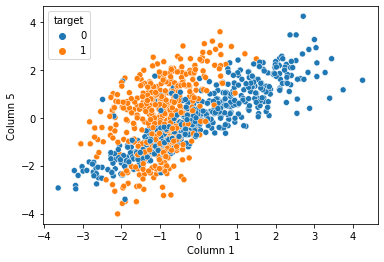

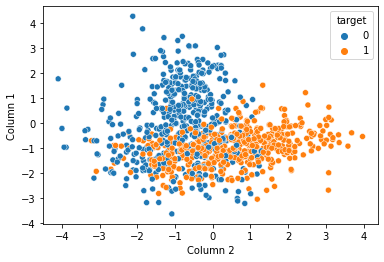

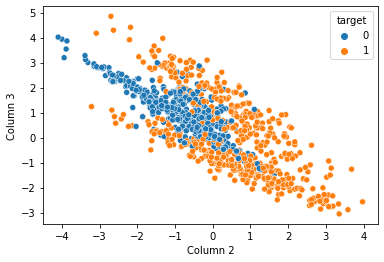

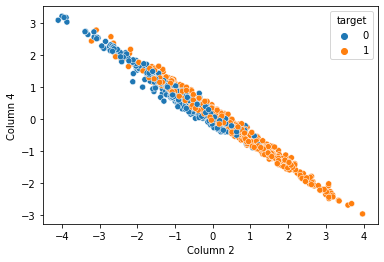

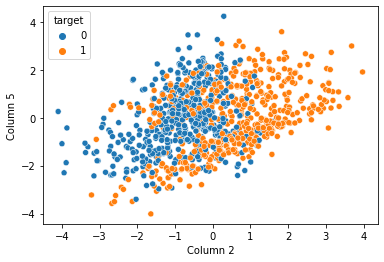

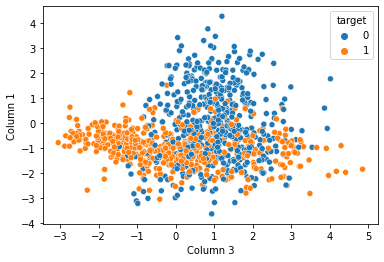

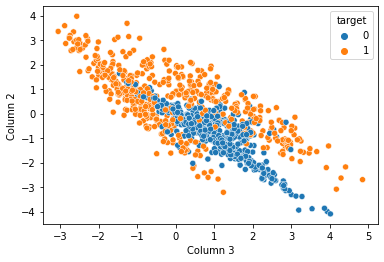

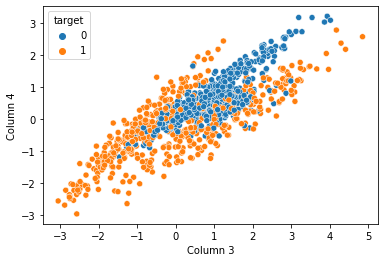

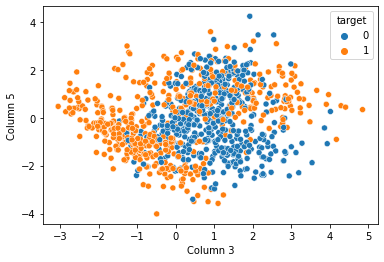

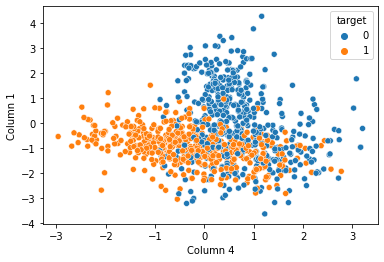

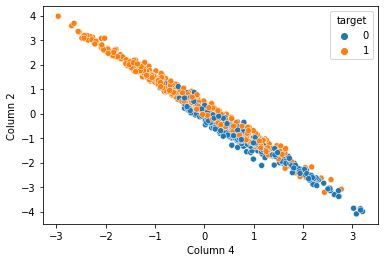

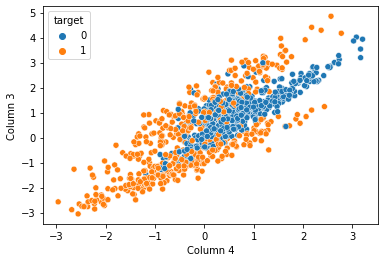

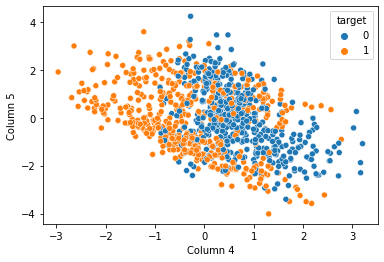

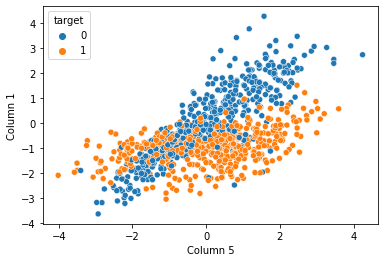

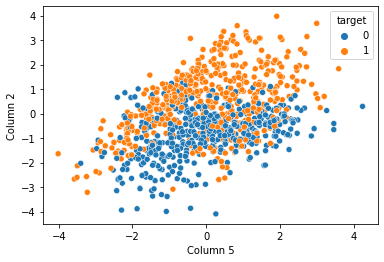

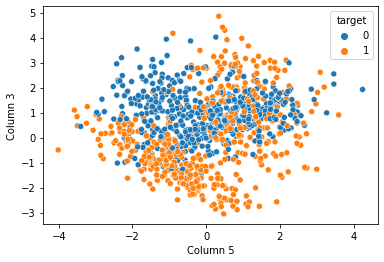

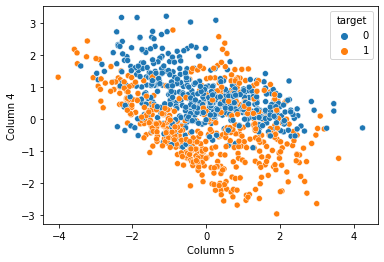

In [44]:
for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        sns.scatterplot(x='column'+str(i), y='column'+str(j), hue='target', data=data)
        plt.xlabel(f'Column {i}')
        plt.ylabel(f'Column {j}')
        plt.show()

In [48]:
x = data.iloc[:,0:5]
y = data.iloc[:,5:6]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(800, 5)
(201, 5)
(800, 1)
(201, 1)


Without Bagging ensemble

In [52]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)
print("Accuracy = ",accuracy_score(ypred,ytest))

Accuracy =  0.8656716417910447


With Bagging ensemble

In [83]:
bagc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,max_samples=0.25,bootstrap=True,random_state=42,oob_score=True)

In [84]:
bagc

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=100, oob_score=True, random_state=42)

In [85]:
bagc.fit(xtrain,ytrain)
ypred1 = bagc.predict(xtest)
print("Accuracy = ",accuracy_score(ypred,ytest))

Accuracy =  0.8656716417910447


In [86]:
bagc.oob_score_

0.895

In [77]:
bagclr = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100,max_samples=0.25,bootstrap=True,random_state=42,oob_score=True)

In [78]:
bagclr

BaggingClassifier(base_estimator=LogisticRegression(), max_samples=0.25,
                  n_estimators=100, oob_score=True, random_state=42)

In [79]:
bagclr.fit(xtrain,ytrain)
ypred1 = bagclr.predict(xtest)
print("Accuracy = ",accuracy_score(ypred,ytest))

Accuracy =  0.8656716417910447


In [82]:
bagclr.oob_score_

0.7975